<a href="https://www.kaggle.com/code/eavprog/abscur-pairs-avg?scriptVersionId=219304667" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Средние значения для парных валютных курсов**

См. страницу на сайте [https://www.abscur.ru/p/blog-page_43.html](https://www.abscur.ru/p/blog-page_43.html)


# Диапазоны

In [1]:
import pandas as pd

# Получение сегодняшней даты и вычисление дат в прошлом
today = pd.Timestamp.now().normalize()

days_ago_7 = today - pd.Timedelta(days=7)
month_ago = today - pd.DateOffset(months=1)
quarter_ago = today - pd.DateOffset(months=3)
half_year_ago = today - pd.DateOffset(months=6)
year_ago = today - pd.DateOffset(years=1)
two_years_ago = today - pd.DateOffset(years=2)
three_years_ago = today - pd.DateOffset(years=3)
five_years_ago = today - pd.DateOffset(years=5)
ten_years_ago = today - pd.DateOffset(years=10)

# Создание списка диапазонов и их расшифровок
date_ranges = [
    [month_ago, today, "месяц","1m"],
    [quarter_ago, today, "квартал","1q"],
    [half_year_ago, today, "полгода","y2"],
    [year_ago, today, "год","1y"],
    [two_years_ago, today, "два года","2y"],
    [three_years_ago, today, "три года","3y"],
    [five_years_ago, today, "пять лет","5y"],
    [ten_years_ago, today, "десять лет","10y"]
]

ago_dates = {item[2] : item[0] for item in date_ranges}
period_suffix = {item[2] : item[3] for item in date_ranges}

# Загрузка парных курсов

In [2]:
all_pairs = pd.read_csv('/kaggle/input/abscur2/pairs_close.csv',index_col='Date')
all_pairs.index = pd.to_datetime(all_pairs.index)
all_pairs

,AUDHKD,AUDJPY,AUDSEK,AUDUSD,CADJPY,CADSEK,CHFAUD,CHFHKD,CHFJPY,EURAUD,...,USDRUB,USDSAR,USDSEK,USDSGD,USDTHB,USDTRY,USDTWD,USDUAH,USDVND,USDZAR
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-25,6.1381,92.46000,6.5820,0.78759,94.200,6.6635,1.39890,8.5918,133.09000,1.41341,...,64.48500,3.7580,8.36040,1.34649,32.54,2.36296,31.343,15.49700,21320.0,11.45010
2015-01-26,6.1381,93.87030,6.5820,0.79221,94.959,6.6635,1.39890,8.5918,131.45000,1.41980,...,67.81000,3.7580,8.29077,1.34349,32.54,2.35601,31.318,15.34900,21320.0,11.45010
2015-01-27,6.1434,93.26150,6.4844,0.79214,94.990,6.5965,1.39650,8.5869,130.97819,1.43480,...,67.95500,3.7595,8.18620,1.33931,32.50,2.36314,31.233,15.34900,21320.0,11.56770
2015-01-28,6.1105,92.78060,6.5450,0.78927,93.873,6.6244,1.39990,8.5583,129.62970,1.42960,...,67.91500,3.7585,8.29740,1.35365,32.55,2.38692,31.321,15.65400,21320.0,11.57310
2015-01-29,6.0205,92.01400,6.4182,0.77821,93.728,6.5469,1.39380,8.4014,128.16110,1.45620,...,68.73500,3.7575,8.26040,1.35271,32.76,2.41549,31.502,15.64300,21275.0,11.54670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-20,4.8795,97.50200,6.9115,0.62810,108.536,7.6914,1.75558,8.5805,171.32201,1.65892,...,100.99718,3.7490,11.00340,1.35494,34.07,35.58010,32.316,41.84862,25315.0,18.51491
2025-01-21,4.8817,97.52800,6.8840,0.62620,108.602,7.6576,1.75920,8.5966,171.78207,1.66174,...,99.49526,3.7508,10.99279,1.35477,33.95,35.63490,32.584,41.72052,25260.0,18.49340
2025-01-22,4.8839,98.12600,6.8984,0.62750,108.690,7.6506,1.75265,8.5900,172.58832,1.65913,...,99.24761,3.7479,11.00367,1.35512,33.86,35.64470,32.612,41.73474,25050.0,18.46380


# Таблица средних парных курсов

In [3]:
# Создаем пустой DataFrame для хранения результатов
average_rates = pd.DataFrame()

# Вычисляем средние значения для каждой валютной пары в заданных диапазонах
for range_name, start_date in ago_dates.items():
    # Определяем конец диапазона как следующий день после последней даты в all_pairs
    end_date = all_pairs.index.max() + pd.Timedelta(days=1)
    
    # Фильтруем данные по диапазону
    filtered_data = all_pairs.loc[start_date:end_date]
    
    # Вычисляем среднее значение для каждой валютной пары
    average_rates[range_name] = filtered_data.mean()

# Настройки отображения для вывода всех строк и столбцов
pd.set_option('display.max_rows', None)  # Выводить все строки
pd.set_option('display.max_columns', None)  # Выводить все столбцы

# Выводим результат
average_rates

,месяц,квартал,полгода,год,два года,три года,пять лет,десять лет
AUDHKD,4.835523,4.960283,5.091865,5.121084,5.153171,5.243754,5.387993,5.575877
AUDJPY,97.727078,98.662846,98.470631,99.977879,96.853753,95.096034,88.381393,85.662588
AUDSEK,6.894254,6.993315,6.971999,6.968796,6.992643,7.011614,6.759716,6.609541
AUDUSD,0.622307,0.638497,0.654754,0.656999,0.659911,0.670933,0.691456,0.715516
CADJPY,109.208346,109.073744,108.203712,110.609978,107.763231,105.606910,96.909024,91.422604
CADSEK,7.704742,7.732115,7.659636,7.708573,7.781207,7.785653,7.408492,7.054272
CHFAUD,1.767580,1.757054,1.748527,1.722173,1.706119,1.641720,1.585786,1.483070
CHFHKD,8.557758,8.723264,8.909770,8.825566,8.794806,8.597641,8.519827,8.234710
CHFJPY,172.862911,173.413842,172.217552,172.148413,165.353182,156.445311,140.801735,127.590570
EURAUD,1.662848,1.646111,1.643436,1.641173,1.637900,1.597088,1.603689,1.566057


# Рейтинги средних парных курсов

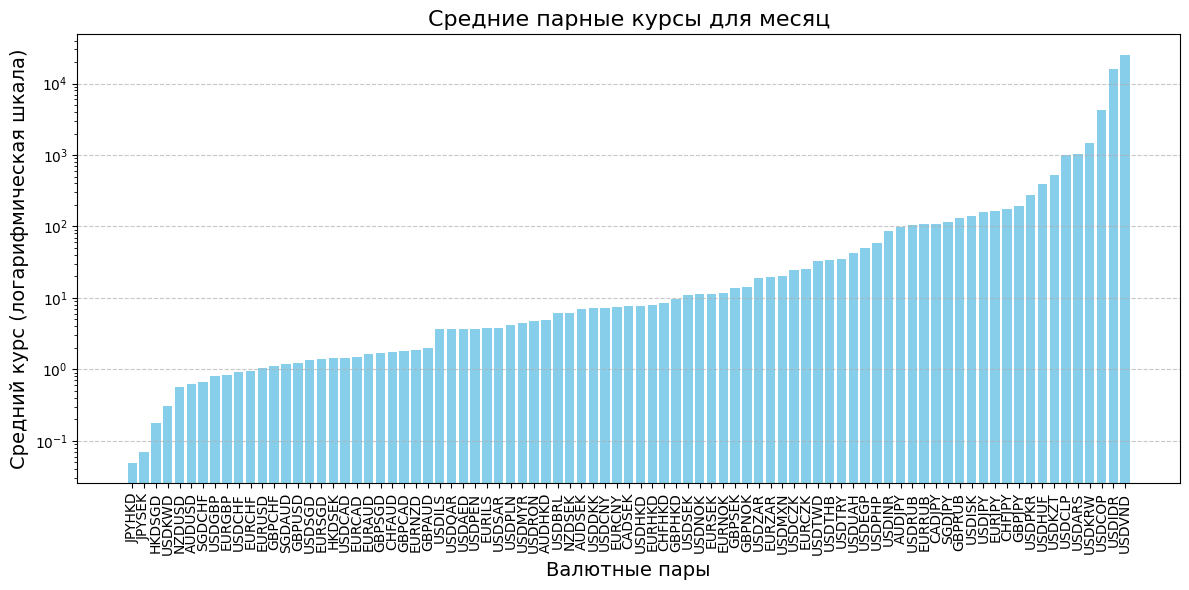

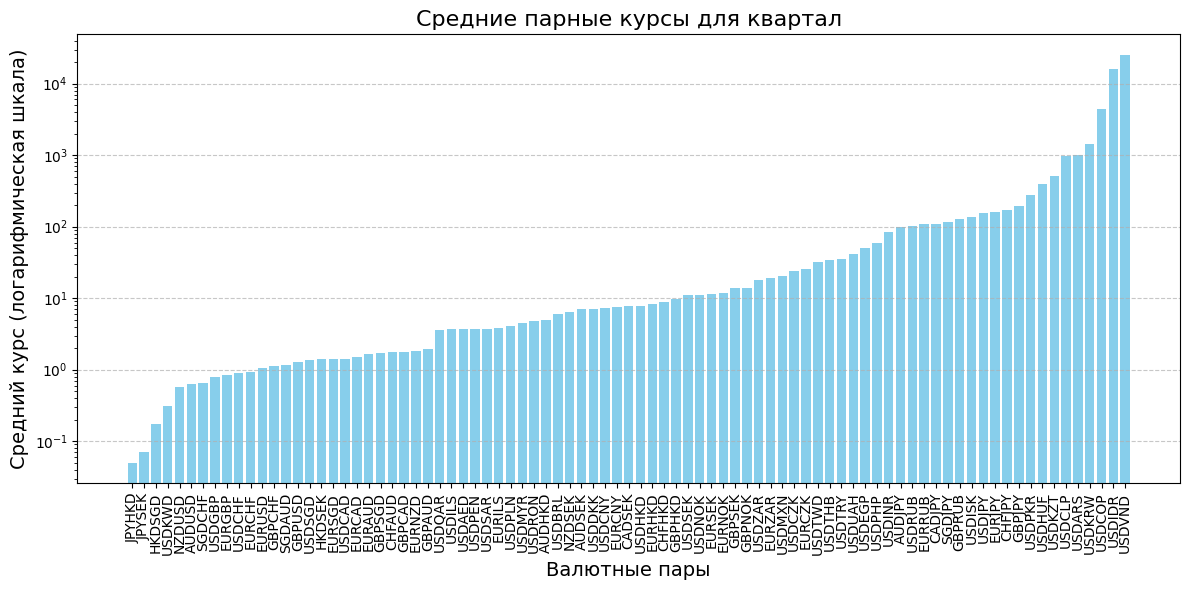

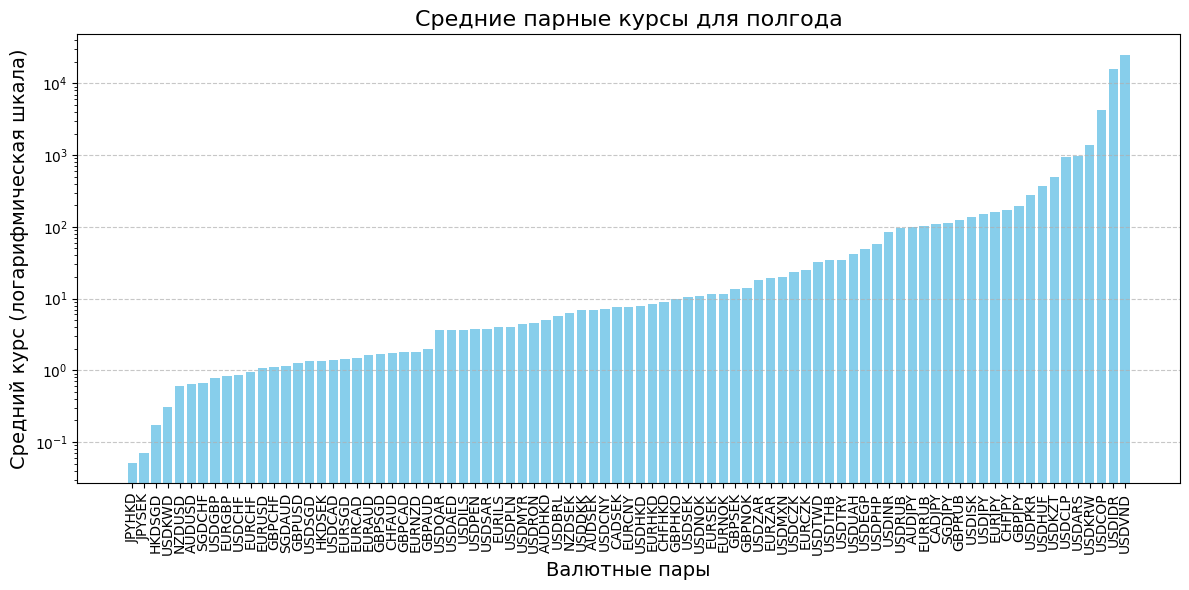

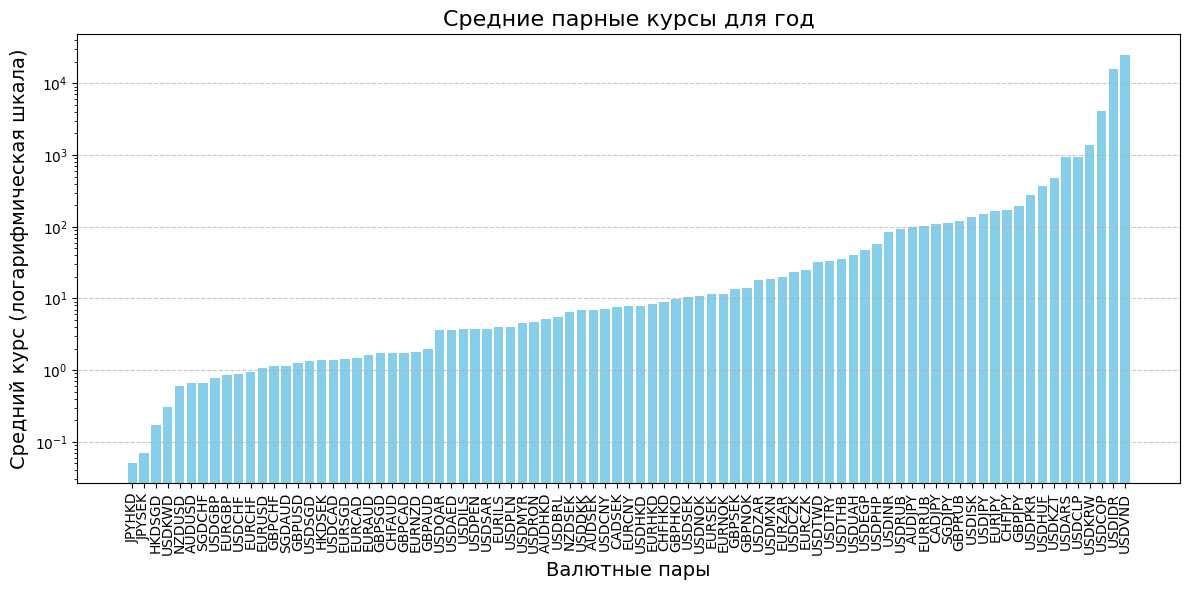

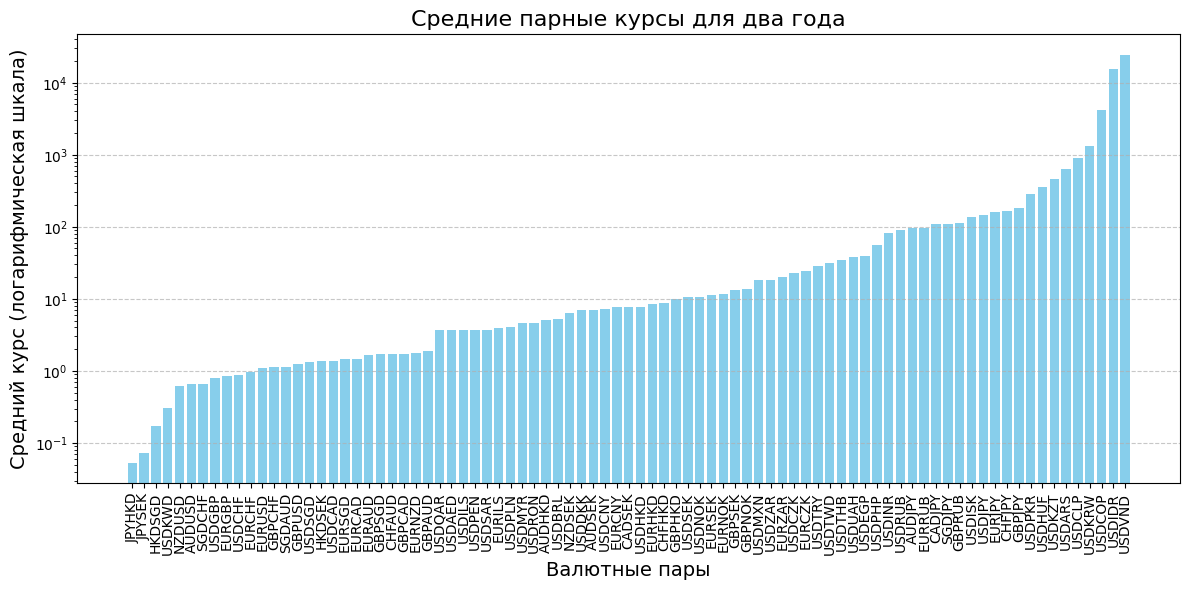

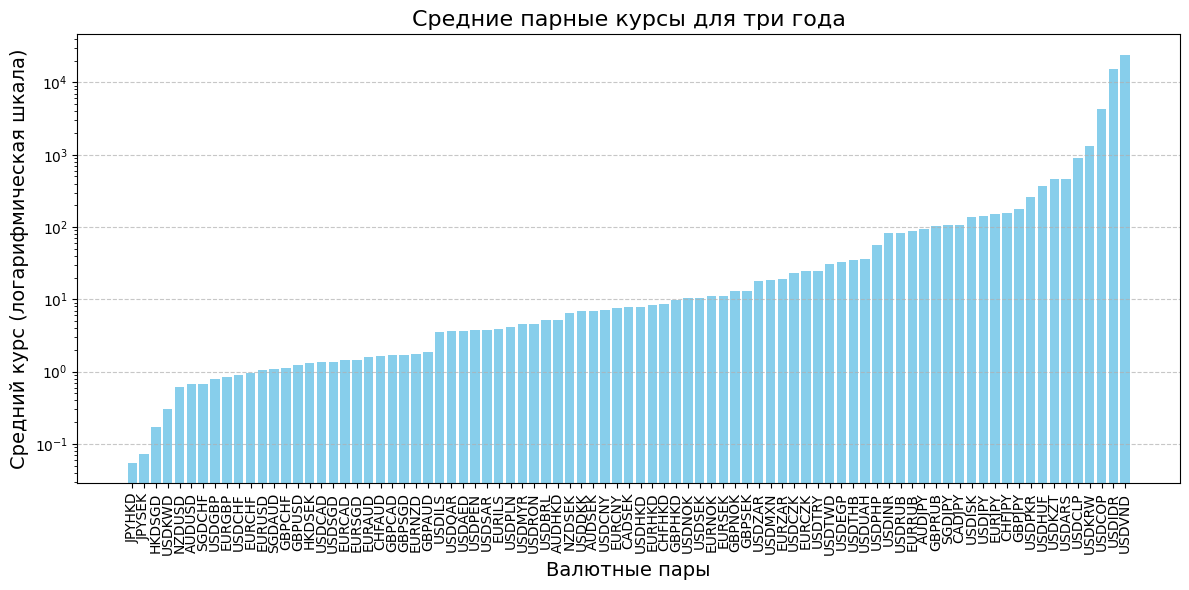

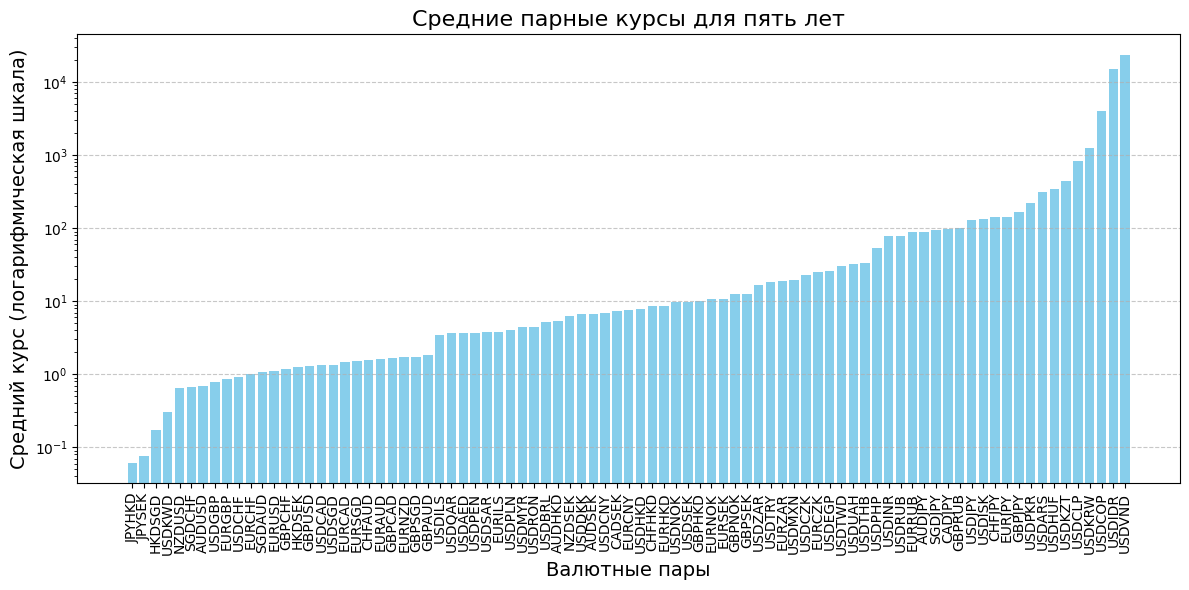

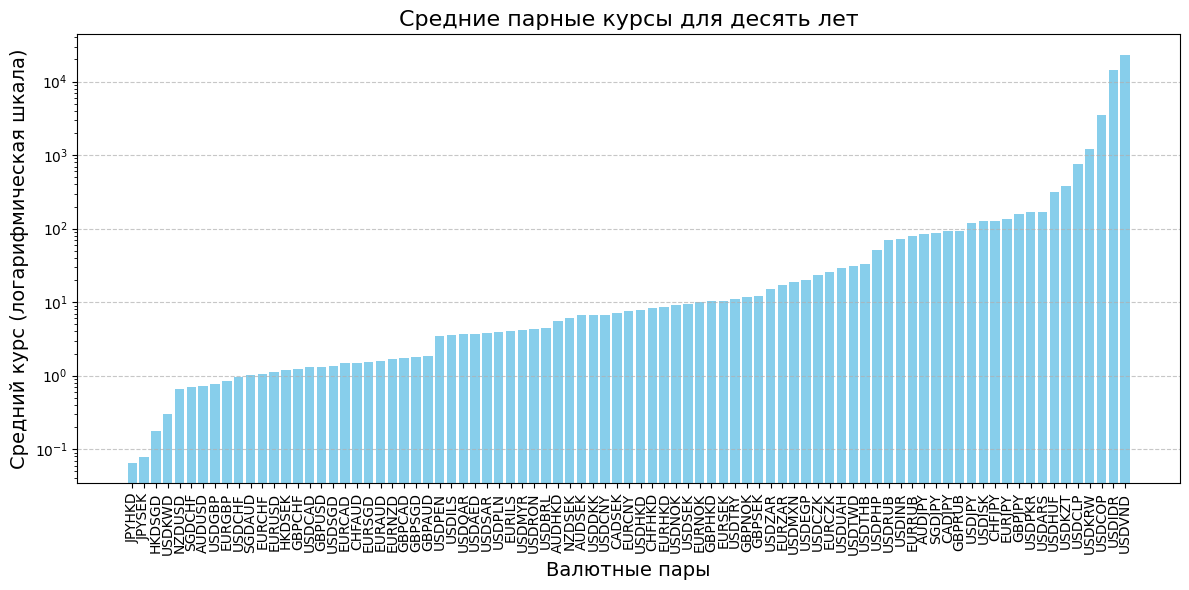

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Генерация столбчатых диаграмм для каждого диапазона
for range_name in average_rates.columns:  # Цикл по колонкам (диапазонам)
    plt.figure(figsize=(12, 6))
    
    # Сортируем значения по возрастанию
    sorted_values = average_rates[range_name].sort_values()
    
    # Создаем столбчатую диаграмму с логарифмической шкалой
    plt.bar(sorted_values.index, sorted_values.values, color='skyblue')
    
    # Настройки графика
    plt.yscale('log')  # Логарифмическая шкала по оси Y
    plt.title(f'Средние парные курсы для {range_name}', fontsize=16)
    plt.xlabel('Валютные пары', fontsize=14)
    plt.ylabel('Средний курс (логарифмическая шкала)', fontsize=14)
    
    # Поворот меток на оси X на 90 градусов
    plt.xticks(rotation=90)
    
    # Добавляем сетку для удобства чтения графика
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Отображаем график
    plt.tight_layout()
    plt.show()

# Генерация HTML-кода

In [5]:
import pandas as pd

# Генерация HTML-кода для таблицы average_rates
html_table = average_rates.to_html(index=True, border=1, justify='right', escape=False)

# Добавление CSS для выравнивания и предотвращения переноса значений в ячейках
html_table = html_table.replace('<table', '<table style="table-layout: fixed; word-wrap: nowrap;"')

# Выводим HTML-код
print(html_table)

<table style="table-layout: fixed; word-wrap: nowrap;" border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>месяц</th>
      <th>квартал</th>
      <th>полгода</th>
      <th>год</th>
      <th>два года</th>
      <th>три года</th>
      <th>пять лет</th>
      <th>десять лет</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>AUDHKD</th>
      <td>4.835523</td>
      <td>4.960283</td>
      <td>5.091865</td>
      <td>5.121084</td>
      <td>5.153171</td>
      <td>5.243754</td>
      <td>5.387993</td>
      <td>5.575877</td>
    </tr>
    <tr>
      <th>AUDJPY</th>
      <td>97.727078</td>
      <td>98.662846</td>
      <td>98.470631</td>
      <td>99.977879</td>
      <td>96.853753</td>
      <td>95.096034</td>
      <td>88.381393</td>
      <td>85.662588</td>
    </tr>
    <tr>
      <th>AUDSEK</th>
      <td>6.894254</td>
      <td>6.993315</td>
      <td>6.971999</td>
      <td>6.968796</td>
      <td>6.992643</td>
      <td>7.0